In [556]:
import numpy as np
import matplotlib.pyplot as plt

In [557]:
from sklearn.datasets import load_boston

In [558]:
np.random.seed(4867)

In [559]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [560]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [561]:
X_data,t_data = load_boston(return_X_y = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [562]:
from sklearn.model_selection import train_test_split
print(X_data.shape)
print(t_data.shape)

X_train,X_test,t_train,t_test = train_test_split(X_data,t_data, test_size=1/5, random_state=True)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)

(506, 13)
(506,)
(404, 13)
(404,)
(102, 13)
(102,)


In [563]:
#Forward Stepwise

In [564]:
K=4

In [565]:
#Function to return W matrix

In [566]:
def reg(X,t):
    A = np.matmul(X.T,X)
    B = np.linalg.pinv(A)
    C = np.matmul(X.T,t)
    w = np.matmul(B,C)
    return w

In [567]:
#RMSE calucator function

In [568]:
def rmse(Y,t,N):
  diff_train = np.subtract(Y,t)
  err_train = np.dot(diff_train.T,diff_train)/N
  RMSE_train = np.sqrt(err_train)
  return RMSE_train

In [569]:
#K-Fold

In [570]:
N = len(X_train)
print(N)

404


In [571]:
M = int(N/K)
print(M)

101


In [572]:
#Duplicating Training and Test set

In [573]:
X_train2 = X_train
t_train2 = t_train
X_test2 = X_test
t_test2 = t_test

In [574]:
def KFOLD(X_train,t_train,K):
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=K, shuffle=True, random_state=np.random.seed(4867))
  
  for train_index, test_index in kf.split(X_train,t_train):
    X_trainF, X_testF = X_train[train_index], X_train[test_index]
    y_trainF, y_testF = t_train[train_index], t_train[test_index]
  
  X_trainF1 = X_trainF[:M]
  X_trainF2 = X_trainF[M:(M*2)]
  X_trainF3 = X_trainF[(M*2):(M*3)]
  X_trainF4 = X_testF
  x = np.array([X_trainF1,X_trainF2,X_trainF3,X_trainF4])
  
  t_trainF1 = y_trainF[:M]
  t_trainF2 = y_trainF[M:(M*2)]
  t_trainF3 = y_trainF[(M*2):(M*3)]
  t_trainF4 = y_testF
  t = np.array([t_trainF1,t_trainF2,t_trainF3,t_trainF4])
  
  
  return [x,t]

In [575]:
#CROSS VALIDATION

In [576]:
[x,t] = KFOLD(X_train,t_train,K)

In [577]:
[x,t] = KFOLD(X_train,t_train,K)
rmse_cv_train = []
rmse_cv = []
rmse_test_output=[]
cv_output = []
s_cv=[None]*13
s_test=[None]*13
s_test_cv=[None]*13
i_cv=[]
i_cvf=[]
index_cv=[]
X_train2 = X_train
X_test2 = X_test
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12]
for j in range(0,14): #stage S
  if j==0:
    x0=[]
    t0=[]
    print("Stage 0: S0 is - Empty lists with 0 features")
    print("")
  else:
    rmse_train = []
    rmse_cv_test = []
    rmse_test = []
    print("Stage {} : S{}".format(j,j))
    #x2=x_test2=[]
    for m in range(0,K):
      rmse_train_cv = []
      rmse_test_cv = []
      x1_test = x[m]
      t1_test = t[m]
      l = np.arange(K)
      l = np.delete(l, m)
      x1 = x[l[0]]
      t1 = t[l[0]]
      l = np.delete(l, 0)
      for k in l:
        x1 = np.append(x1,x[k],axis=0)
        t1 = np.append(t1,t[k],axis=0)

    for i in cols: #choosing features
      
      x2 = x1[:,i]
      if j>1:
        x2 = np.append(s_cv[j-2],x2)
      x2 = np.reshape(x2,(303,j))
      
      s_cv[j-1]=x2

      w = reg(x2,t1)
      y = np.matmul(x2,w)
      RMSE_train = rmse(y,t1,303)
      rmse_train.append(RMSE_train)


      x2_test = x1_test[:,i]
      #print(x2_test.shape)
      if j>1:
        x2_test = np.append(s_test[j-2],x2_test)
      x2_test = np.reshape(x2_test,(101,j))
      
      s_test[j-1] = x2_test
      t2_test = t1_test
      y2_test = np.matmul(x2_test,w)
      RMSE_cv_test = rmse(y2_test,t2_test,101)
      rmse_cv_test.append(RMSE_cv_test)


      x_test2 = X_test2[:,i]
      if j>1:
        x_test2 = np.append(s_test_cv[j-2],x_test2)
      x_test2 = np.reshape(x_test2,(102,j))
      
      s_test_cv[j-1] = x_test2

      y_test = np.matmul(x_test2,w)
      RMSE_test = rmse(y_test,t_test,102)
      rmse_test.append(RMSE_test)

    #print(rmse_train)
    #print(rmse_cv_test)
    #print(rmse_test)

    rmse_cv_train.append(np.sqrt(sum(rmse_train)/K))
    print("Cross validation training error:",rmse_cv_train)
    rmse_cv.append(np.sqrt(sum(rmse_cv_test)/K))
    print("Cross validation test error:",rmse_cv)
    rmse_test_output.append(np.sqrt(sum(rmse_test)/K))
    print("Test error:",rmse_test_output)
      
    mn = rmse_cv_test.index(min(rmse_cv_test))
    print('Feature/column of the training set chosen is',mn)

    #print("cols",cols)
    e = cols.pop(mn)
    i_cv.append(e)
    print("Remaining features/columns in training set:",cols)
    print("The features/columns chosen in this stage:",i_cv)
    print("")
print("The final set features/columns observed:",i_cv)
rmse_train_cv = rmse_cv_train
rmse_train3 = rmse_cv
rmse_test3 = rmse_test_output
w_final = w
i_cvf = i_cv

Stage 0: S0 is - Empty lists with 0 features

Stage 1 : S1
Cross validation training error: [7.117040140199333]
Cross validation test error: [7.122564346486919]
Test error: [7.24629841097052]
Feature/column of the training set chosen is 5
Remaining features/columns in training set: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12]
The features/columns chosen in this stage: [5]

Stage 2 : S2
Cross validation training error: [7.117040140199333, 6.891531732346273]
Cross validation test error: [7.122564346486919, 7.028067781779281]
Test error: [7.24629841097052, 6.89333629794793]
Feature/column of the training set chosen is 9
Remaining features/columns in training set: [0, 1, 2, 3, 4, 6, 7, 8, 9, 11, 12]
The features/columns chosen in this stage: [5, 10]

Stage 3 : S3
Cross validation training error: [7.117040140199333, 6.891531732346273, 6.472645925152906]
Cross validation test error: [7.122564346486919, 7.028067781779281, 6.633914168884788]
Test error: [7.24629841097052, 6.89333629794793, 6.683748

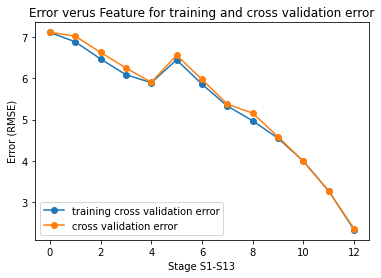

In [578]:
plt.plot(np.arange(len(rmse_cv_train)),rmse_cv_train,'-o',label='training cross validation error')
plt.plot(np.arange(len(rmse_cv)),rmse_cv,'-o',label='cross validation error')
plt.title("Error verus Feature for training and cross validation error")
plt.ylabel("Error (RMSE)")
plt.xlabel("Stage S1-S13")
plt.legend()
rmse_cv2=rmse_cv

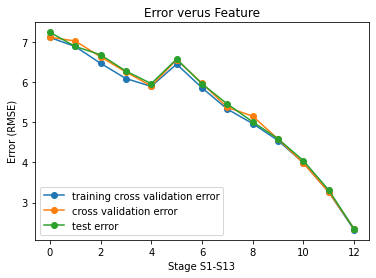

In [579]:
plt.plot(np.arange(len(rmse_cv_train)),rmse_cv_train,'-o',label='training cross validation error')
plt.plot(np.arange(len(rmse_cv)),rmse_cv,'-o',label='cross validation error')
plt.plot(np.arange(len(rmse_test_output)),rmse_test_output,'-o',label='test error')
plt.title("Error verus Feature for training, cross validation and test error")
plt.title("Error verus Feature")
plt.ylabel("Error (RMSE)")
plt.xlabel("Stage S1-S13")
plt.legend()
rmse_cv2=rmse_cv

In [580]:
#Basis expansion

In [581]:
#First model is Sqaure

In [582]:
X_train3 = np.power(X_train,2)
t_train3 = np.power(t_train,2)
X_test3 = np.power(X_test,2)
t_test3 = np.power(t_test,2)

In [583]:
print(X_train3.shape)

(404, 13)


In [584]:
[x,t] = KFOLD(X_train3,t_train3,K)
print(x.shape)
print(t.shape)

(4, 101, 13)
(4, 101)


In [585]:
s_cv=[None]*13
s_test_cv=[None]*13
i_cv=[]
index_cv=[]
rmse_train2 = []
rmse_test2 = []
rmse_test_op = []
for i in range(0,K):
  l = np.arange(K)
  l = np.delete(l, i)
  x1 = x[l[0]]
  t1 = t[l[0]]
  l = np.delete(l, 0)
  for j in l:
    x1 = np.append(x1,x[j],axis=0)
    t1 = np.append(t1,t[j],axis=0)
  w = reg(x1,t1)
  y = np.matmul(x1,w)
  RMSE_train = rmse(y,t1,303)
  rmse_train2.append(RMSE_train)
  #find rmse error on test fold set

  #w_test = reg(x[i],t[i])
  y_test = np.matmul(x[i],w)
  RMSE_test = rmse(y_test,t[i],101)
  rmse_test2.append(RMSE_test)

  y_test2 = np.matmul(X_test3,w)
  RMSE_test = rmse(y_test2,t_test3,102)
  rmse_test_op.append(RMSE_test)
#print(rmse_train2)
#print(rmse_test2)
#print(rmse_test_op)
print("Cross validation error:",np.sqrt(sum(rmse_test2)/K))
print("Test error:",np.sqrt(sum(rmse_test_op)/K))

Cross validation error: 18.2179086157464
Test error: 17.497151906448074


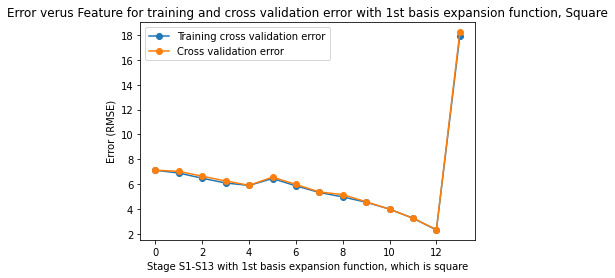

In [586]:
rmse_train_cv.append(np.sqrt(sum(rmse_train2)/K))
rmse_train3.append(np.sqrt(sum(rmse_test2)/K))
rmse_test3.append(np.sqrt(sum(rmse_test_op)/K))
plt.plot(np.arange(len(rmse_train_cv)),rmse_train_cv,'-o',label='Training cross validation error')
plt.plot(np.arange(len(rmse_train3)),rmse_train3,'-o',label='Cross validation error')
#plt.plot(np.arange(len(rmse_test3)),rmse_test3,'-o',label='Test error')
plt.title("Error verus Feature for training and cross validation error with 1st basis expansion function, Square")
plt.ylabel("Error (RMSE)")
plt.xlabel("Stage S1-S13 with 1st basis expansion function, which is square")
plt.legend()

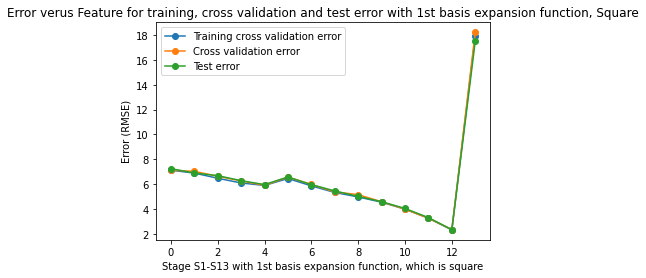

In [587]:
plt.plot(np.arange(len(rmse_train_cv)),rmse_train_cv,'-o',label='Training cross validation error')
plt.plot(np.arange(len(rmse_train3)),rmse_train3,'-o',label='Cross validation error')
plt.plot(np.arange(len(rmse_test3)),rmse_test3,'-o',label='Test error')
plt.title("Error verus Feature for training, cross validation and test error with 1st basis expansion function, Square")
plt.ylabel("Error (RMSE)")
plt.xlabel("Stage S1-S13 with 1st basis expansion function, which is square")
plt.legend()

In [588]:
#Second model is Square Root

In [589]:
X_train3 = np.power(X_train,(1/2))
t_train3 = np.power(t_train,(1/2))
X_test3 = np.power(X_test,(1/2))
t_test3 = np.power(t_test,(1/2))

In [590]:
print(X_train3.shape)

(404, 13)


In [591]:
[x,t] = KFOLD(X_train3,t_train3,K)
print(x.shape)
print(t.shape)

(4, 101, 13)
(4, 101)


In [592]:
s_cv=[None]*13
s_test_cv=[None]*13
i_cv=[]
index_cv=[]
rmse_train2 = []
rmse_test2 = []
rmse_test_op = []
for i in range(0,K):
  l = np.arange(K)
  l = np.delete(l, i)
  x1 = x[l[0]]
  t1 = t[l[0]]
  l = np.delete(l, 0)
  for j in l:
    x1 = np.append(x1,x[j],axis=0)
    t1 = np.append(t1,t[j],axis=0)
  w = reg(x1,t1)
  y = np.matmul(x1,w)
  RMSE_train = rmse(y,t1,303)
  rmse_train2.append(RMSE_train)
  #find rmse error on test fold set

  #w_test = reg(x[i],t[i])
  y_test = np.matmul(x[i],w)
  RMSE_test = rmse(y_test,t[i],101)
  rmse_test2.append(RMSE_test)

  y_test2 = np.matmul(X_test3,w)
  RMSE_test = rmse(y_test2,t_test3,102)
  rmse_test_op.append(RMSE_test)
#print(rmse_train2)
#print(rmse_test2)
#print(rmse_test_op)
print("Cross validation error:",np.sqrt(sum(rmse_test)/K))
print("Test error:",np.sqrt(sum(rmse_test_op)/K))

Cross validation error: 2.3383444116557524
Test error: 0.6669128432253796


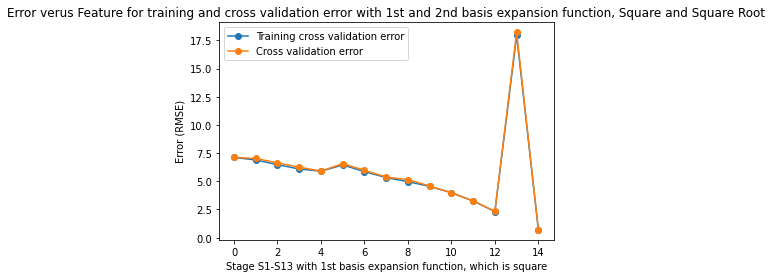

In [593]:
rmse_train_cv.append(np.sqrt(sum(rmse_train2)/K))
rmse_train3.append(np.sqrt(sum(rmse_test2)/K))
rmse_test3.append(np.sqrt(sum(rmse_test_op)/K))
plt.plot(np.arange(len(rmse_train_cv)),rmse_train_cv,'-o',label='Training cross validation error')
plt.plot(np.arange(len(rmse_train3)),rmse_train3,'-o',label='Cross validation error')
#plt.plot(np.arange(len(rmse_test3)),rmse_test3,'-o',label='Test error')
plt.title("Error verus Feature for training and cross validation error with 1st and 2nd basis expansion function, Square and Square Root")
plt.ylabel("Error (RMSE)")
plt.xlabel("Stage S1-S13 with 1st basis expansion function, which is square")
plt.legend()

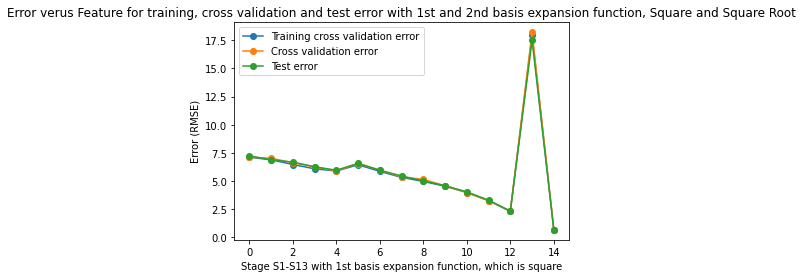

In [594]:
plt.plot(np.arange(len(rmse_train_cv)),rmse_train_cv,'-o',label='Training cross validation error')
plt.plot(np.arange(len(rmse_train3)),rmse_train3,'-o',label='Cross validation error')
plt.plot(np.arange(len(rmse_test3)),rmse_test3,'-o',label='Test error')
plt.title("Error verus Feature for training, cross validation and test error with 1st and 2nd basis expansion function, Square and Square Root")
plt.ylabel("Error (RMSE)")
plt.xlabel("Stage S1-S13 with 1st basis expansion function, which is square")
plt.legend()

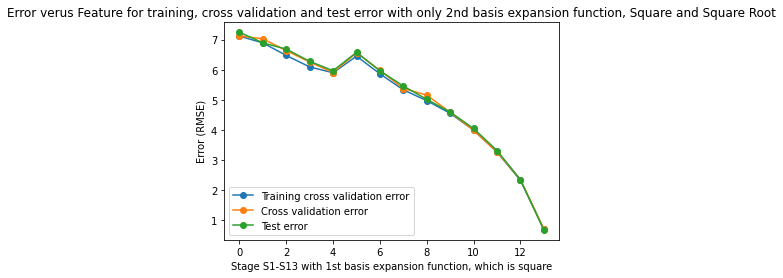

In [595]:
rmse_train_cv.pop(-2)
rmse_train3.pop(-2)
rmse_test3.pop(-2)
plt.plot(np.arange(len(rmse_train_cv)),rmse_train_cv,'-o',label='Training cross validation error')
plt.plot(np.arange(len(rmse_train3)),rmse_train3,'-o',label='Cross validation error')
plt.plot(np.arange(len(rmse_test3)),rmse_test3,'-o',label='Test error')
plt.title("Error verus Feature for training, cross validation and test error with only 2nd basis expansion function, Square and Square Root")
plt.ylabel("Error (RMSE)")
plt.xlabel("Stage S1-S13 with 1st basis expansion function, which is square")
plt.legend()

In [596]:
#Hence, from the above plots we conclude that 2nd basis expansion function, which is square root (2nd basis function), is to be chosen.